In [2]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *
from ODE_lag_utils_init import *

import matplotlib as mpl
import pandas as pd
import multiprocessing

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

In [3]:
# load the data for the community outcomes
R = 4
path = "../data/seq_vs_co_lag"
path_orig = "../data/ecol_adv_no_lag"
rhos = np.linspace(0, 0.4, 51)[1:]
# get the result for pairwise
all_frac_diaux_pair = []
tau=0.4

frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}_tau0=0.4.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    # print(len([i for i in ids_list if i<Nseq]), len(ids_list))
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"pairwise_rho={rho}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

all_frac_diaux = []
all_divs = []
all_stratified = []
frac_diaux = []
divs = []
stratified = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}_tau0=0.4.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    divs.append([min(4, len(i)) for i in ids])
    frac_diaux_strat = []
    lenlist = []
    for num in range(R):
        ids_list = sum([i for i in ids if len(i)==num+1], [])
        if(len(ids_list)>0):
            frac_diaux_strat.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
        else:
            frac_diaux_strat.append(0)
        lenlist.append([len(i) for i in ids].count(num+1))
    stratified.append([lenlist, frac_diaux_strat])
all_frac_diaux.append(frac_diaux)
all_divs.append(divs)
all_stratified.append(stratified)

frac_diaux = []
div = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"full_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div.append(np.mean([len(i) for i in ids]))
all_frac_diaux.append(frac_diaux)

100%|██████████| 50/50 [01:52<00:00,  2.24s/it]


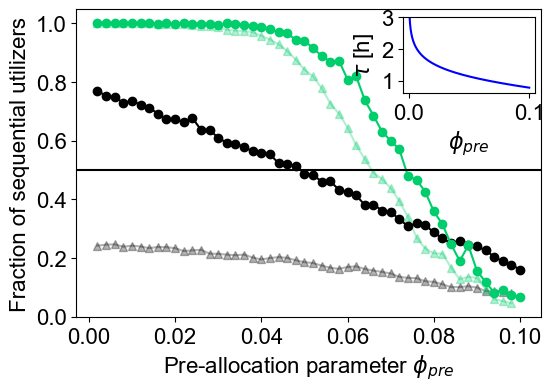

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (6,4)
for idx, frac_diaux_pair in enumerate(all_frac_diaux_pair[:1]):
    ax.plot([i/R for i in rhos][:-1], [frac_diaux_pair[i]/2+frac_diaux_pair[i+1]/2 for i in range(len(frac_diaux_pair)-1)], marker="^", c="k", alpha=0.3, label="$\\tau_0=0.4$")
for idx, frac_diaux in enumerate(all_frac_diaux[:1]):
    ax.plot([i/R for i in rhos][:-1], [frac_diaux[i]/2+frac_diaux[i+1]/2 for i in range(len(frac_diaux_pair)-1)], marker="^", c="#00CD6C", alpha=0.3)

ax.plot([i/R for i in rhos], all_frac_diaux_pair[1][:len(rhos)], marker="o", c="k", label="$\\tau_0=0$")
ax.plot([i/R for i in rhos], all_frac_diaux[1][:len(rhos)], marker="o", c="#00CD6C")
ax.axhline(0.5, c='k')
# plt.legend(loc="upper right")
ax.set_xlabel("Pre-allocation parameter $\phi_{pre}$")
ax.set_ylabel("Fraction of sequential utilizers")

ax_inset = fig.add_axes([0.67, 0.67, 0.22, 0.19])

tau0 = 0.4
rholist = np.linspace(0.001, 0.4, 1000)
lag = tau0*np.log((1-3*rholist/4)/(rholist/4))
ax_inset.plot(rholist/4, lag, color='b', label='Inset plot')
ax_inset.set_ylim(0.6, 3.0)
ax_inset.set_xlabel("$\phi_{pre}$")
ax_inset.set_ylabel("$\\tau$ [h]")
plt.savefig("../figures/div_vs_frac_diaux_lag.pdf", bbox_inches="tight")